In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

In [2]:
deliveries = pd.read_csv("deliveries_updated_mens_ipl.csv")
matches = pd.read_csv("matches_updated_mens_ipl.csv")
ipl = pd.merge(deliveries,matches)


#Cleaning up the Season
ipl.season = ipl.season.apply(lambda x: "2010" if x=="2009/10" else x)
ipl.season = ipl.season.apply(lambda x: "2020" if x=="2020/21" else x)

# 1. Best Finisher of All Time

In [3]:
# lets assume the death over as last 4 overs (16,17,18 and 19)

In [4]:
# Filtering deliveries only on death overs
deathOverMin = 16
deathOverDeliveries = ipl[ipl["over"]>=deathOverMin]

In [5]:
# Removing Wide and No Ball deliveries from the death over deliveries as they might mess up our answer
deathOverDeliveries = deathOverDeliveries[deathOverDeliveries["isWide"].isnull()]
deathOverDeliveries = deathOverDeliveries[deathOverDeliveries["isNoBall"].isnull()]

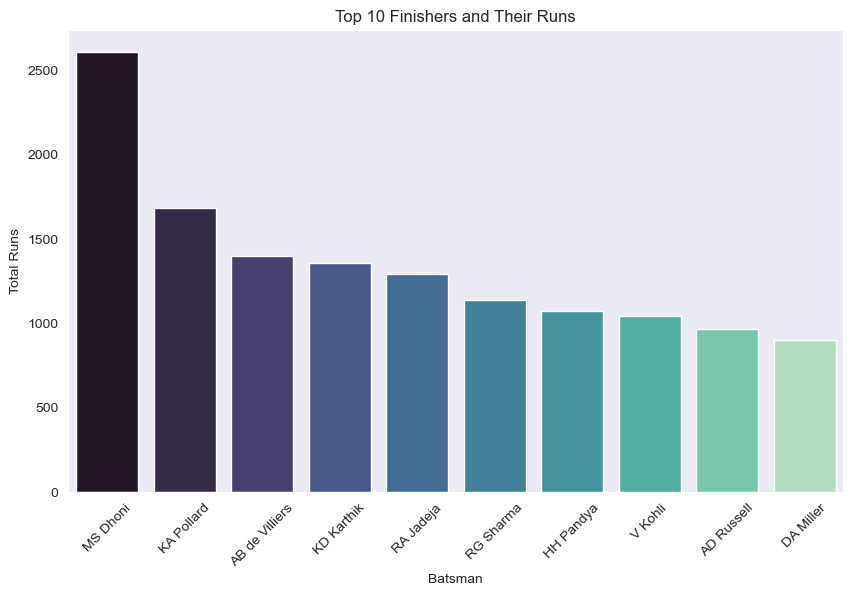

In [6]:
# lets find the top 10 Finishers of All Time

top10Finishers = pd.DataFrame(deathOverDeliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)[:10]).reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='batsman', y='batsman_runs', data=top10Finishers, palette='mako')

plt.title('Top 10 Finishers and Their Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

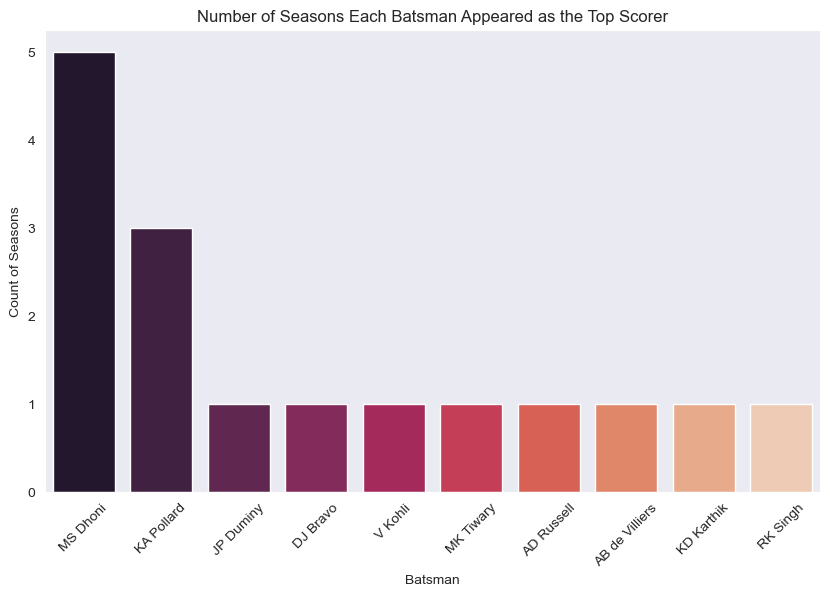

In [7]:
# Who has been the best finisher for most number of seasons?

seasonsAndBatsmen = deathOverDeliveries.groupby(["season","batsman"])["batsman_runs"].sum().reset_index()
idx = seasonsAndBatsmen.groupby("season")["batsman_runs"].idxmax()
max_runs_per_season = seasonsAndBatsmen.loc[idx].sort_values(by="season").reset_index(drop=True)

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='batsman', palette="rocket", data=max_runs_per_season, order=max_runs_per_season['batsman'].value_counts().index)

plt.title('Number of Seasons Each Batsman Appeared as the Top Scorer')
plt.ylabel('Count of Seasons')
plt.xlabel('Batsman')
plt.xticks(rotation=45)
plt.show()